In [1]:
import pandas as pd
import pandas.io.data
import numpy as np
import pytz
from datetime import datetime
import zipline as zp
import matplotlib.pyplot as plt
from zipline.finance.slippage import FixedSlippage

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [14]:
%matplotlib inline
import zipline

In [13]:
%%zipline --start=2011-1-1 --end=2016-1-1 -o perf
from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

ERROR: Cell magic `%%zipline` not found.


,AAPL
Date,
2016-04-25 00:00:00+00:00,105.080002
2016-04-26 00:00:00+00:00,104.349998
2016-04-27 00:00:00+00:00,97.820000
2016-04-28 00:00:00+00:00,94.830002
2016-04-29 00:00:00+00:00,93.739998


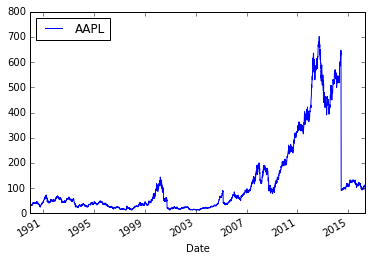

In [24]:
start = datetime(1990, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2016,5, 1, 0, 0, 0, 0, pytz.utc)
data = zp.utils.factory.load_from_yahoo(stocks=['AAPL'], indexes={}, start=start,
                                        end=end, adjusted=False)
data.plot()
data.tail()

In [25]:
class BuyApple(zp.TradingAlgorithm): # inherit from TradingAlgorithm
    def handle_data(self, data): # overload handle_data() method
        self.order('AAPL', 1) # stock (='AAPL') to order and amount (=1 shares)

In [26]:
algo = BuyApple()

In [27]:
perf = algo.run(data)

UnsupportedOrderParameters: Passing non-Asset argument to 'order()' is not supported. Use 'sid()' or 'symbol()' methods to look up an Asset.